In [16]:
import json
import os
import matplotlib.pyplot as plt
from collections import Counter

In [19]:
def getallarticleids(metadata_path="/data/afield6/afield6/moksh/media_frames_corpus/immigration_metadata.json"):
    '''
    return type: list
    return all original article ids from this subgroup(immigration or samesex or tobacco)
    all article ids from this metadata file(because getting from metadat so these are all article ids, no more no less)
    
    input is metadata directory path
    '''
    article_ids=[]
    with open(metadata_path, 'r') as file:
        data = json.load(file)
                
        # Extract frames and add them to the combined dictionary
        for article_id, _ in data.items():
            article_ids.append(article_id)
    return article_ids

In [20]:
def getallframes(dir_path):
    '''
    return list type, all gen frames from all articles in this directory
    return list, return ids of all articles that have their frames generated
    ex input: dir_path="/data/afield6/afield6/moksh/mediaframes_output_data/seg_frames/immigration"
    '''
    allframes=[] #all frames from all articles
    gen_articleids=[]
    for filename in os.listdir(dir_path):
        if filename.endswith(".json"):  # Ensure it's a JSON file
            file_path = os.path.join(dir_path, filename)
            
            # Load the JSON file
            with open(file_path, 'r') as file:
                data = json.load(file)
                
                # Extract frames and add them to the combined dictionary
                for article_id, annotations in data.items():
                    for annotation in annotations['LLM_Annotation']:
                        if not(isinstance(annotation['frame'], str)):
                            print(filename,article_id, annotation['frame'])
                        else:
                            allframes.append(annotation['frame'])
                    gen_articleids.append(article_id)
    
    return allframes, gen_articleids


In [21]:
dir_path="/data/afield6/afield6/moksh/mediaframes_output_data/seg_frames/immigration"
gen_frames_immigration, gen_articleids=getallframes(dir_path=dir_path)
og_article_ids=getallarticleids()
another_method_og_ids=getallarticleids(metadata_path="/data/afield6/afield6/moksh/media_frames_corpus/immigration.json")

print('-------number of articles--------')
print('immigration')
print('original #:', len(og_article_ids), len(set(og_article_ids)))
print('another og #:', len(another_method_og_ids), len(set(another_method_og_ids)))
print('gen #:', len(gen_articleids), len(set(gen_articleids)))
print("**Notes: original counted using _metadata.json, another og used immigratino.json")

print(og_article_ids[-10:])
print(gen_articleids[-10:])
print(len(gen_frames_immigration))
print(type(gen_frames_immigration))
print(len(set(gen_frames_immigration)))

immigration64.json Immigration1.0-1424 None
immigration314.json Immigration1.0-30986 {'frame': 'Political Strategy'}
immigration314.json Immigration1.0-30986 {'frame': 'Politics'}
immigration314.json Immigration1.0-30986 {'frame': 'Security'}
immigration314.json Immigration1.0-30986 {'frame': 'Law Enforcement'}
immigration314.json Immigration1.0-30986 {'frame': 'Legislative Process'}
immigration314.json Immigration1.0-30986 {'frame': 'Economic Consequences'}
immigration314.json Immigration1.0-30986 {'frame': 'Political Strategy'}
immigration314.json Immigration1.0-30986 {'frame': 'Security'}
immigration314.json Immigration1.0-30986 {'frame': 'Political Stalemate'}
immigration314.json Immigration1.0-30986 {'frame': 'Political Stalemate'}
immigration314.json Immigration1.0-30986 {'frame': 'Political Stalemate'}
immigration314.json Immigration1.0-30986 {'frame': 'Political Stalemate'}
immigration488.json Immigration1.0-565 {'Frame': 'Economics'}
immigration488.json Immigration1.0-565 {'Fr

In [ ]:
for frame in gen_frames_immigration:
    if len(frame) > 20:
        print(frame)

In [25]:
data=["$122", "help"]
escaped_data = [s.replace("$", "\$") for s in data]
escaped_data

['\\$122', 'help']

In [27]:
gen_frames_immigration = [s.replace("$", "\$") for s in gen_frames_immigration]

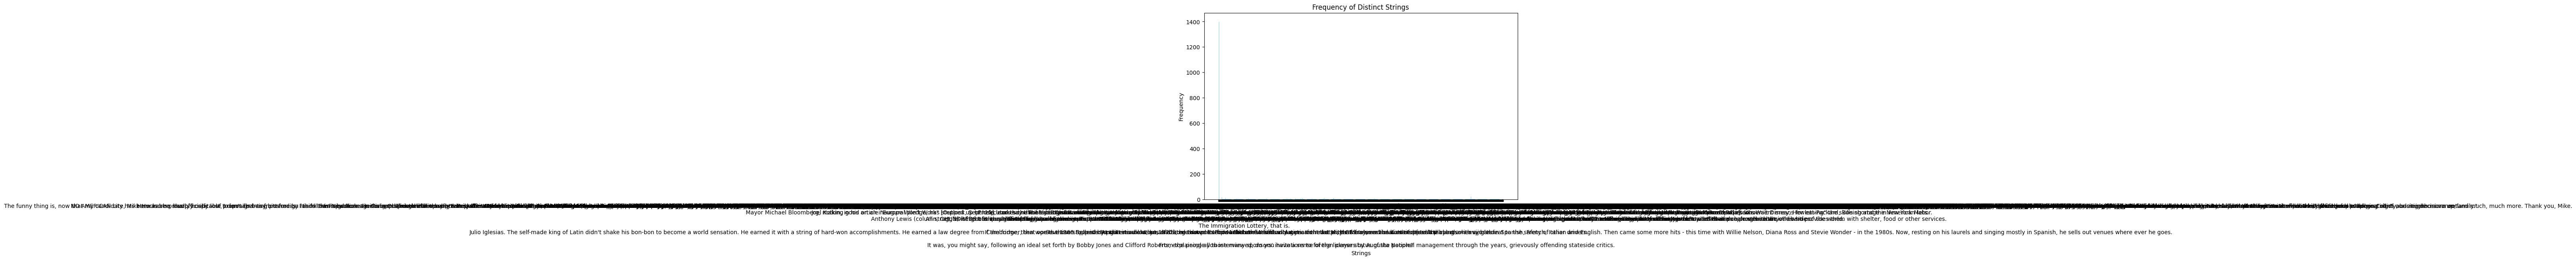

In [28]:
# Example list with different strings
strings_list = gen_frames_immigration
# Count the frequencies
string_counts = Counter(strings_list)

# Separate the strings and their counts for plotting
labels = list(string_counts.keys())
frequencies = list(string_counts.values())

# Plotting
plt.rcParams['text.usetex'] = False
plt.figure(figsize=(10, 6))
plt.bar(labels, frequencies, color='skyblue')
plt.xlabel('Strings')
plt.ylabel('Frequency')
plt.title('Frequency of Distinct Strings')
plt.show()
